# Explore Scikitlearn with Palmer Penguins

In [37]:
import seaborn as sns
import seaborn.objects as so
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [38]:
# See avaiable datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [39]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

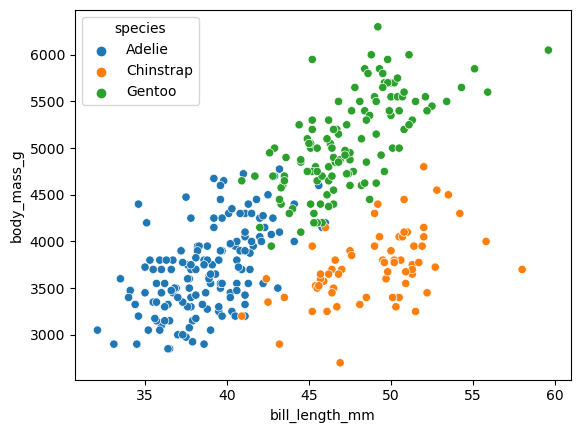

In [40]:
sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='body_mass_g',
    hue='species'
)

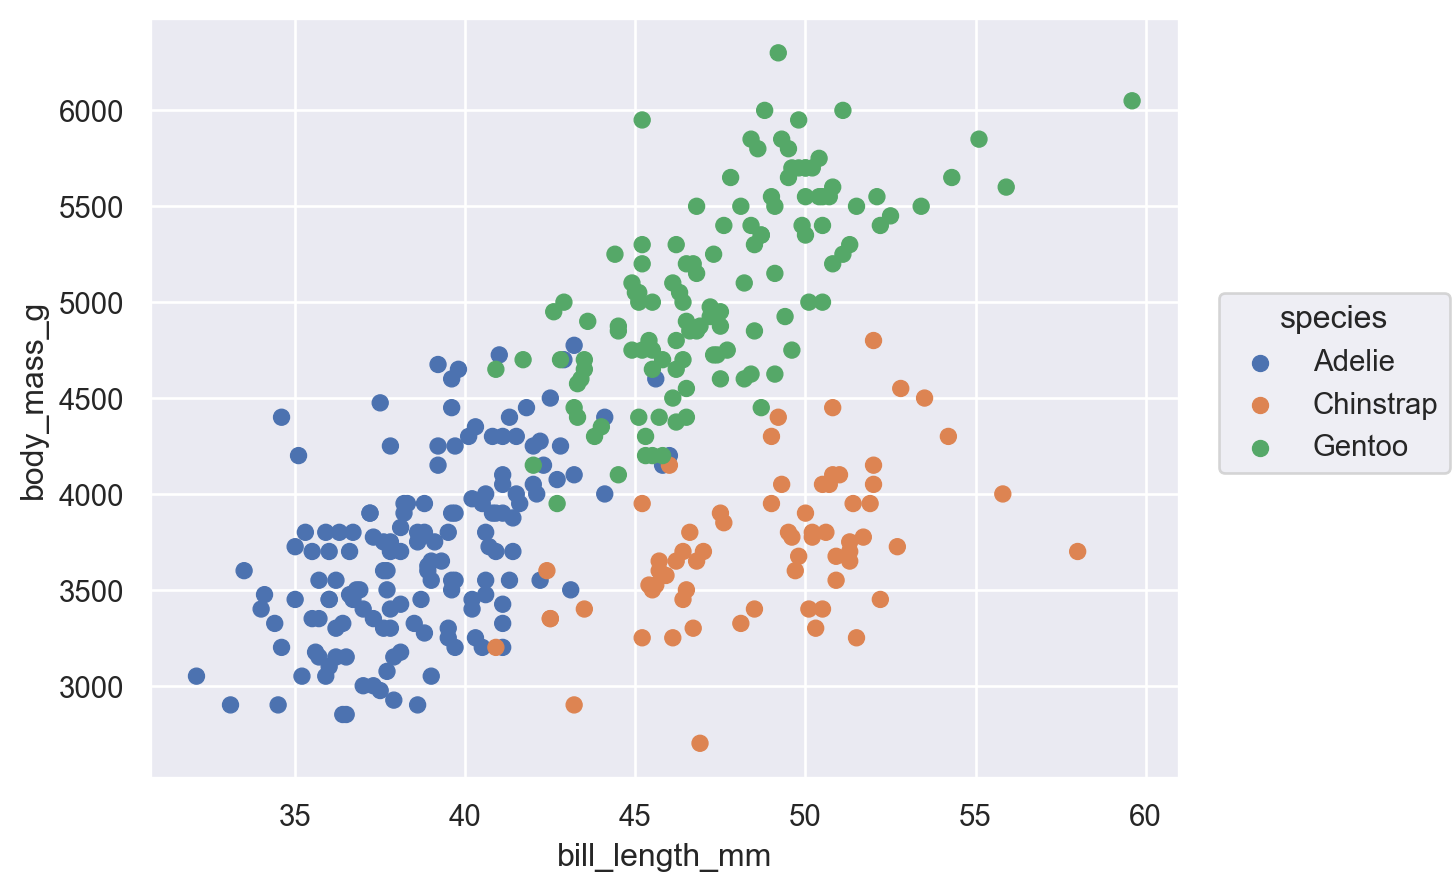

In [41]:
(so.Plot(data=penguins_df,
         x='bill_length_mm',y='body_mass_g',
         color='species')
 .add(so.Dot())
)

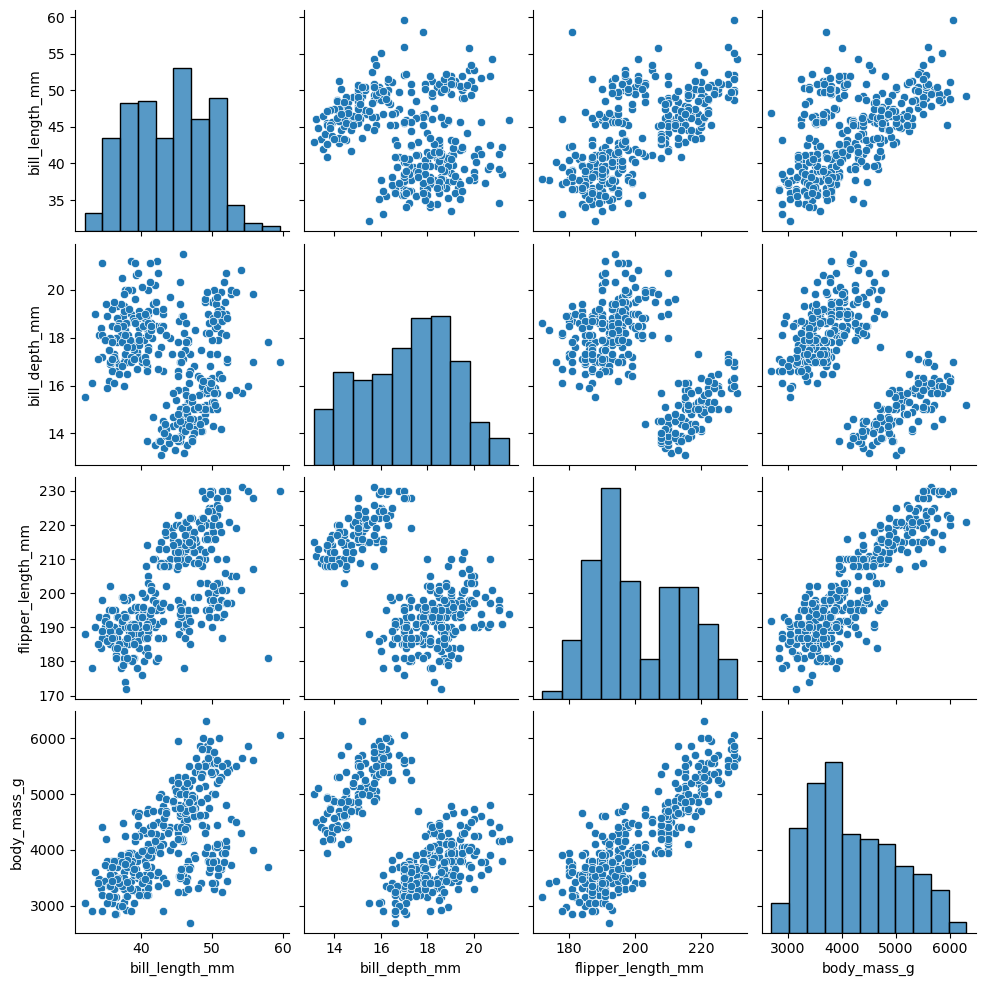

In [42]:
sns.pairplot(penguins_df)

Coefficients: 
 [50.15326594]
Mean squared error: 153789.68
Coefficient of determination: 0.76


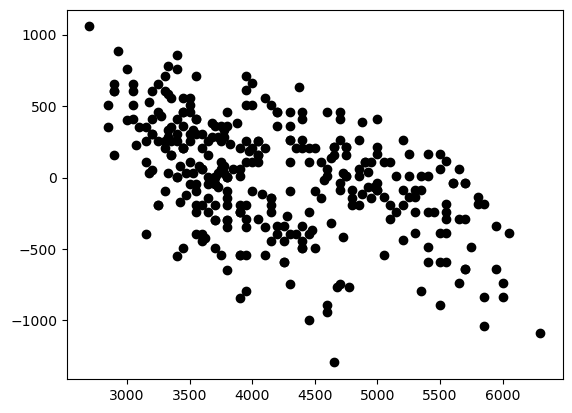

In [63]:
penguins_df = penguins_df.dropna()
# Create linear regression object
regr = skl.linear_model.LinearRegression()

penguins_X =  penguins_df.flipper_length_mm.values.reshape(-1,1)
penguins_Y = penguins_df.body_mass_g.values
# Train the model using the training sets
regr.fit(penguins_X, penguins_Y)

# Make predictions using the testing set
penguins_predicted_Y = (regr.predict(penguins_X))

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(
    penguins_Y, penguins_predicted_Y))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(
    penguins_Y, penguins_predicted_Y))

# Plot outputs
plt.scatter(penguins_Y, penguins_predicted_Y - penguins_Y, color="black")
# plt.plot(penguins_X, penguins_Y, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()